In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/Heart_Disease.csv")

In [ ]:
data.head(10)

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No
5,6,65.0,Female,4,120,177,0,0,140,0,0.4,1,0,7,Private,formerly smoked,No
6,7,56.0,Female,3,130,256,1,2,142,1,0.6,2,1,6,Private,never smoked,Yes
7,8,59.0,Female,4,110,239,0,2,142,1,1.2,2,1,7,Private,never smoked,Yes
8,9,60.0,Female,4,140,293,0,2,170,0,1.2,2,2,7,Private,Unknown,Yes
9,10,63.0,Male,4,150,407,0,2,154,0,4.0,2,3,7,Private,Unknown,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

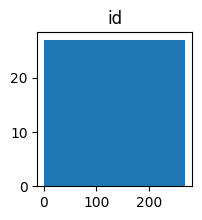

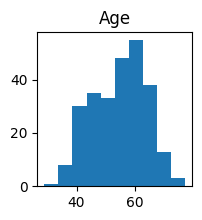

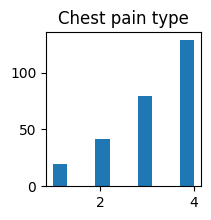

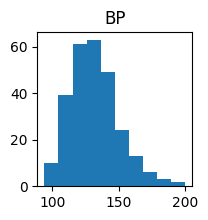

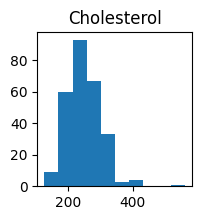

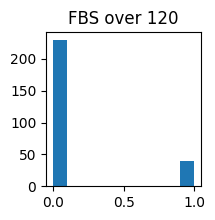

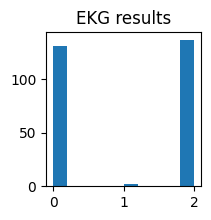

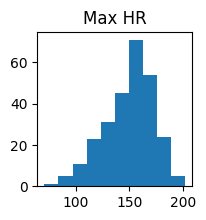

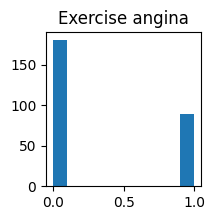

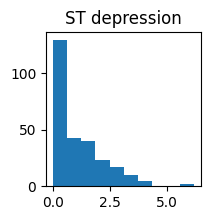

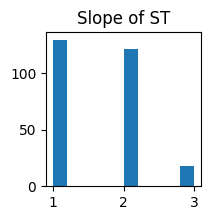

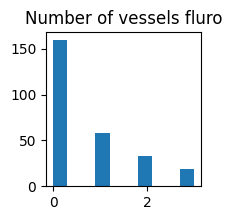

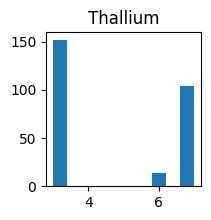

In [ ]:
for col in data.select_dtypes(include=[np.number]).columns:
    fig = plt.figure(figsize=(2, 2))
    #str(col) converts the column name to a string
    plt.title(str(col))
    plt.hist(data[col])


id: Identifier for each individual

Age: Age of the individual

Gender: Gender of the individual

Chest pain type: Type of chest pain experienced (values: 1, 2, 3, 4)

BP: Blood pressure of the individual

Cholesterol: Cholesterol level of the individual

FBS over 120: Fasting blood sugar > 120 mg/dl (values: 0 for false, 1 for true)

EKG results: Electrocardiogram results (values: 0, 1, 2)

Max HR: Maximum heart rate achieved

Exercise angina: Exercise-induced angina (values: 0 for no, 1 for yes)

ST depression: ST depression induced by exercise relative to rest

Slope of ST: Slope of the peak exercise ST segment (values: 1, 2, 3)

Number of vessels fluro: Number of major vessels colored by fluoroscopy (values: 0, 1, 2, 3)

Thallium: Thallium stress test result (values: 3, 6, 7)

work_type: Type of work (e.g., Private, Self-employed, Govt_job)

smoking_status: Smoking status of the individual (e.g., never smoked, formerly smoked, smokes, unknown)

Heart Disease: Presence of heart disease (values: Yes, No)




**Data preprocessing**

In [ ]:
#dealing with nulls
missing_values = data.isnull().sum()
print(missing_values)

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64


Interpolation: Interpolation is a method used to estimate missing values by filling in the gaps between known data points. It works by assuming a linear relationship between the existing data points and filling in the missing values accordingly. This method is useful when dealing with time series data or data with a clear sequential order.

In [ ]:
modified = data['Age'].interpolate()
data['Age'].fillna(modified, inplace=True)

In [ ]:
data['work_type'].fillna(data['work_type'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace=True)
mode_value = data['smoking_status'].mode()[0]

In [ ]:
#checking the nulls 
missing_values = data.isnull().sum()
print(missing_values)

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64


In [ ]:
 data.drop('id', axis=1,inplace=True )

In [ ]:
#dealing with duplicates
duplicate_rows = data.duplicated().sum()
print(duplicate_rows)
#there is no duplicates 

0


**trying to solve the unkown problem**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table using crosstab
contingency_table = pd.crosstab(data['Gender'], data['smoking_status'])

# Print the contingency table
print(contingency_table)

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


smoking_status  Unknown  formerly smoked  never smoked  smokes
Gender                                                        
Female               39               45            65      36
Male                 12               27            37       9
Chi-square statistic: 6.540549892453006
P-value: 0.08807696109863795


To interpret the results, we consider the p-value. If the p-value is less than a predetermined significance level (commonly 0.05), we reject the null hypothesis of independence, indicating that there is evidence of a relationship between the variables. Conversely, if the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is insufficient evidence to establish a significant association.

In your case, the p-value is approximately 0.0881, which is greater than 0.05. Therefore, at the conventional significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that there is a significant association between 'Gender' and 'smoking_status'


**the null hypothesis** is that there is no association between gender and smoking status.

<ipython-input-285-721c10735e39>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[[ 'Gender', 'Cholesterol', 'Max HR', 'ST depression','smoking_status']].corr()


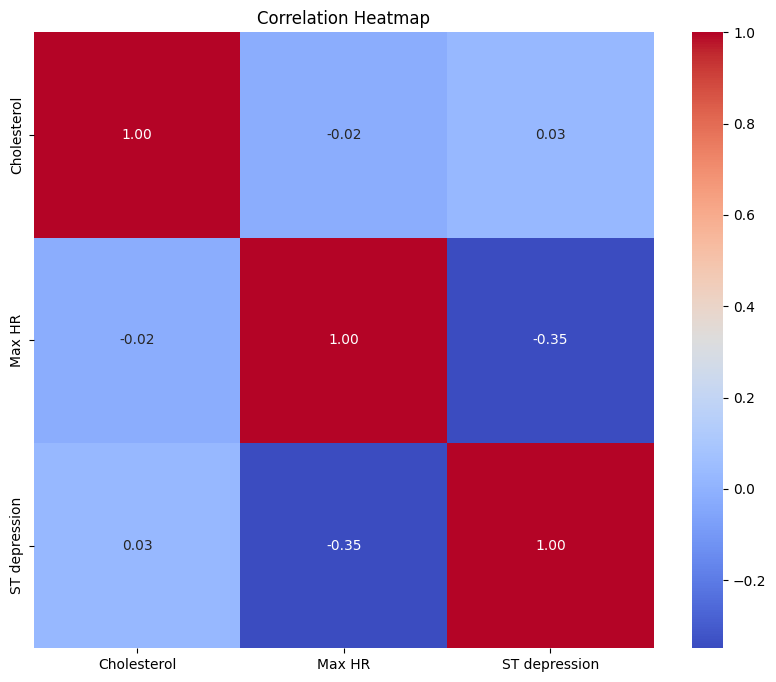

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data[[ 'Gender', 'Cholesterol', 'Max HR', 'ST depression','smoking_status']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

this helps identify patterns and relationships within the dataset, allowing for a better understanding of the interdependencies between the variables.

In [ ]:
data['smoking_status'].replace('Unknown', mode_value, inplace=True)

In [ ]:
#feature selection using filterd (chi-square)
from scipy.stats import chi2_contingency
import pandas as pd

# Iterate over all columns (excluding the target variable)
for col in data.columns:
    if col != 'Heart Disease':  # Replace 'Heart Disease' with the actual column name of your target variable
        # Create a contingency table using crosstab
        contingency_table = pd.crosstab(data[col], data['Heart Disease'])

        # Print the contingency table
        print(contingency_table)

        # Perform chi-square test of independence
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print("Variable:", col)
        print("Chi-square statistic:", chi2)
        print("P-value:", p_value)
        print()


Heart Disease  No  Yes
Age                   
29.0            1    0
34.0            2    0
35.0            1    2
37.0            2    0
38.0            0    1
39.0            2    1
40.0            1    2
41.0            8    1
42.0            7    2
43.0            5    2
44.0            8    2
45.0            6    1
46.0            4    3
47.0            2    2
48.0            4    3
49.0            1    2
50.0            4    3
51.0            9    3
52.0            8    3
53.0            6    2
54.0            9    6
55.0            2    4
55.5            1    0
56.0            2    6
57.0            7    5
58.0            5   10
59.0            5    6
60.0            3    9
61.0            1    7
62.0            5    6
63.0            3    4
64.0            5    4
65.0            4    4
66.0            3    3
67.0            3    5
68.0            2    1
69.0            2    1
70.0            2    3
71.0            3    0
74.0            1    0
76.0            1    0
77.0       

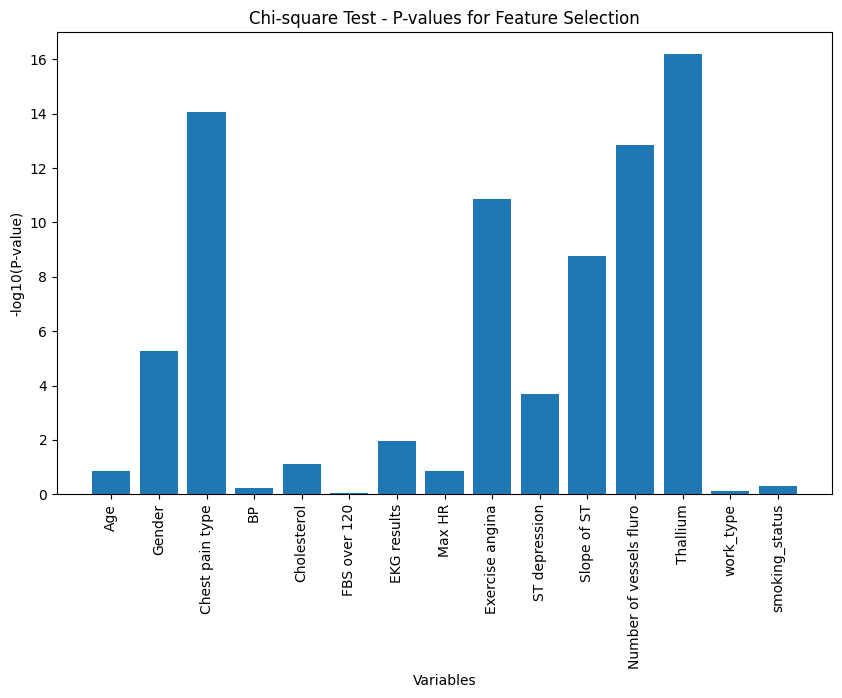

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

p_values = []
variables = []

# Iterate over all columns (excluding the target variable)
for col in data.columns:
    if col != 'Heart Disease':  # Replace 'Heart Disease' with the actual column name of your target variable
        # Create a contingency table using crosstab
        contingency_table = pd.crosstab(data[col], data['Heart Disease'])

        # Perform chi-square test of independence
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Append the p-value and variable name to the lists
        p_values.append(p_value)
        variables.append(col)

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.bar(variables, -np.log10(p_values))
plt.title('Chi-square Test - P-values for Feature Selection')
plt.xlabel('Variables')
plt.ylabel('-log10(P-value)')
plt.xticks(rotation=90)
plt.show()


Higher bars: Variables with higher bars indicate a lower p-value, suggesting a stronger statistical evidence of a relationship between that variable and the target variable ("Heart Disease" in this case). These variables are more likely to be informative and have a significant impact on predicting or understanding the occurrence of heart disease.

Lower bars: Variables with lower bars indicate a higher p-value, suggesting weaker statistical evidence of a relationship. These variables are less likely to be significantly associated with the target variable.

<ipython-input-289-d1f0e5ccca51>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


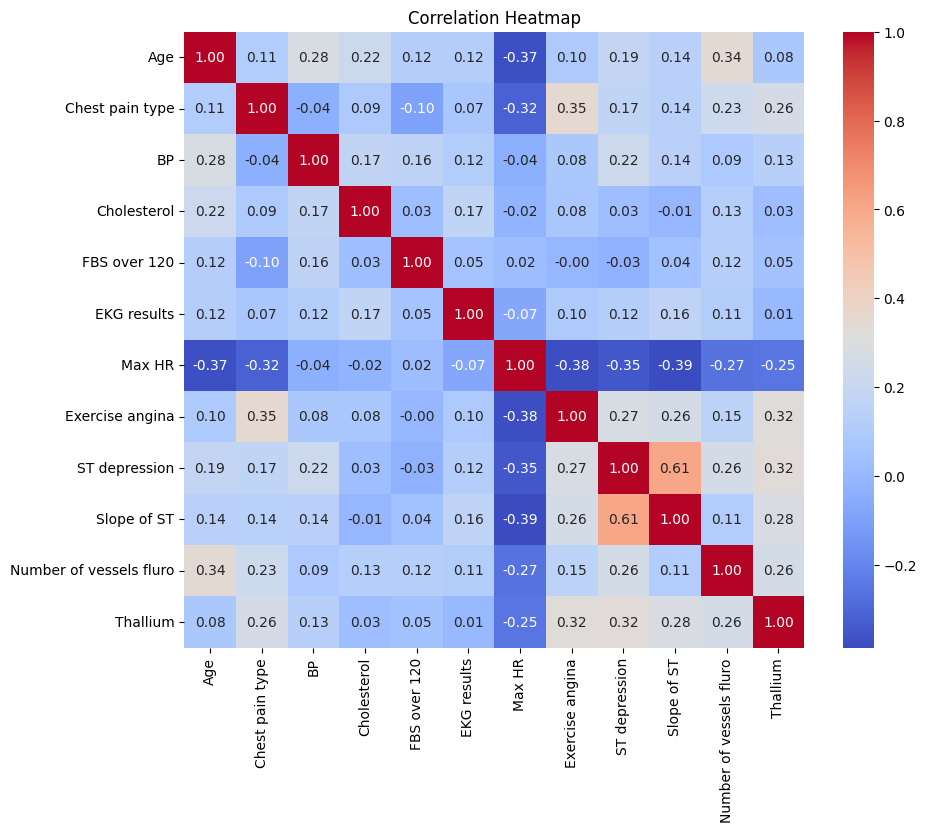

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


hot and lable encodeing 

In [ ]:
#one-hot encoding for working_type
work_type_encoded = pd.get_dummies(data['work_type'], prefix='work_type')
data = pd.concat([data, work_type_encoded], axis=1)
#one-hot encoding for smoking-status
smoking_status_encoded = pd.get_dummies(data['smoking_status'], prefix='smoking_status')
data = pd.concat([data, smoking_status_encoded], axis=1)
data = data.drop(['work_type', 'smoking_status'], axis=1)

In [ ]:
# Apply label encoding to categorical columns
categorical_columns = ['Gender', 'Heart Disease'	,'Heart Disease']
label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Thallium,Heart Disease,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,70.0,0,4,130,322,0,2,109,0,2.4,...,3,1,0,0,1,0,0,1,0,0
1,67.0,1,3,115,564,0,2,160,0,1.6,...,7,0,0,0,0,1,0,0,1,0
2,57.0,0,2,124,261,0,0,141,0,0.3,...,7,1,0,0,1,0,0,0,1,0
3,64.0,0,4,128,263,0,0,105,1,0.2,...,7,0,0,0,1,0,0,0,0,1
4,74.0,1,2,120,269,0,2,121,1,0.2,...,3,0,0,0,0,1,0,0,1,0


dealing with outliers

In [ ]:
means = data.mean()
stds = data.std()

# Print mean and standard deviation of each column
for column in data.columns:
    print(f"Column: {column}")
    print(f"Mean: {means[column]}")
    print(f"Standard Deviation: {stds[column]}")
    print()

Column: Age
Mean: 54.487037037037034
Standard Deviation: 9.18221260715169

Column: Gender
Mean: 0.3148148148148148
Standard Deviation: 0.46530455606111304

Column: Chest pain type
Mean: 3.174074074074074
Standard Deviation: 0.9500900339228638

Column: BP
Mean: 131.34444444444443
Standard Deviation: 17.861608292800856

Column: Cholesterol
Mean: 249.65925925925927
Standard Deviation: 51.68623711643124

Column: FBS over 120
Mean: 0.14814814814814814
Standard Deviation: 0.3559064769707314

Column: EKG results
Mean: 1.0222222222222221
Standard Deviation: 0.9978912089661108

Column: Max HR
Mean: 149.67777777777778
Standard Deviation: 23.165716775120096

Column: Exercise angina
Mean: 0.3296296296296296
Standard Deviation: 0.4709515913013828

Column: ST depression
Mean: 1.05
Standard Deviation: 1.1452098393779973

Column: Slope of ST
Mean: 1.5851851851851853
Standard Deviation: 0.6143898376781299

Column: Number of vessels fluro
Mean: 0.6703703703703704
Standard Deviation: 0.9438963834881157



In [ ]:
# Select only the numeric columns for analysis
numeric_columns = data.select_dtypes(include=np.number)

# Calculate the range, mean, and standard deviation for each numeric column
column_stats = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Range': numeric_columns.max() - numeric_columns.min(),
    'Mean': numeric_columns.mean(),
    'Std': numeric_columns.std()
})

# Set a threshold for determining significant differences
threshold = 50

# Print the columns with significant differences in range, mean, or standard deviation
significant_columns = column_stats[
    (column_stats['Range'] > threshold) |
    (column_stats['Mean'].abs() > threshold) |
    (column_stats['Std'] > threshold)
]['Column'].tolist()

print("Columns with significant differences:")
print(significant_columns)

Columns with significant differences:
['Age', 'BP', 'Cholesterol', 'Max HR']


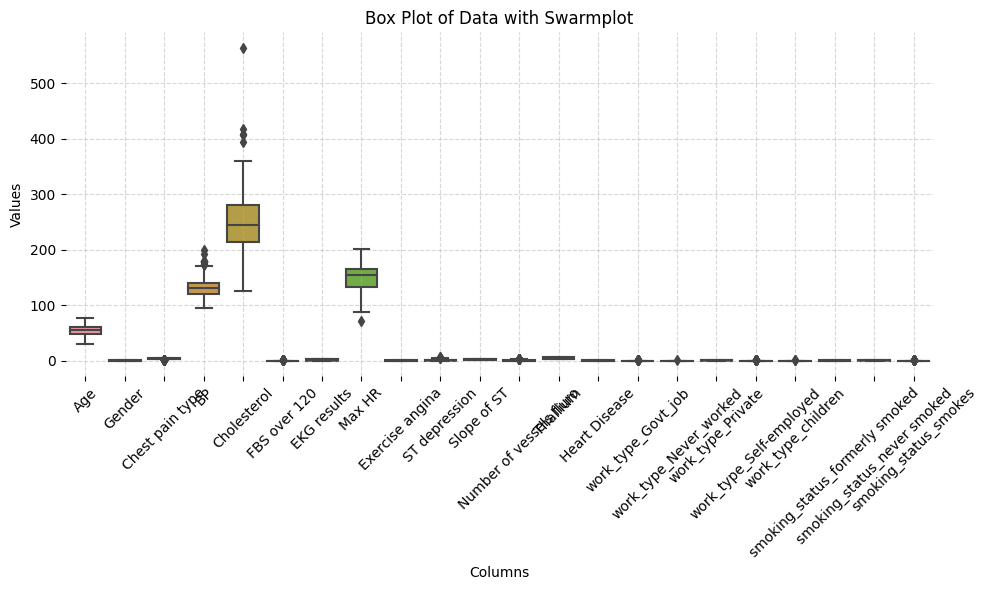

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Customize box plot colors
boxplot_colors = [(0.6, 0.8, 1, 0.8), (0.6, 1, 0.6, 0.8), (1, 1, 0.6, 0.8), (1, 0.6, 0.6, 0.8)]
whisker_colors = [(0, 0.4, 1), (0, 0.6, 0), (0.8, 0.8, 0), (1, 0, 0)]

# Plot box plots for each column
sns.boxplot(data=data)



# Set the title and labels for the plot
plt.title('Box Plot of Data with Swarmplot')
plt.xlabel('Columns')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Remove the outer frame of the plot
plt.box(False)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

*why we should deal with the outliers for this * Chest pain type: Different types of chest pain can indicate different underlying causes and severity of heart disease. Outliers in chest pain type may suggest atypical symptoms or unusual presentations that require further investigation.

BP (blood pressure): High or low blood pressure values can indicate hypertension or hypotension, which are important risk factors for heart disease. Outliers in blood pressure could represent extreme cases or individuals with unique physiological conditions.

Cholesterol: High cholesterol levels are associated with an increased risk of heart disease. Outliers in cholesterol levels may indicate individuals with exceptionally high or low values that require closer examination.

FBS over 120 (fasting blood sugar): Elevated fasting blood sugar levels can be a sign of diabetes, which is a risk factor for heart disease. Outliers in fasting blood sugar can help identify patients with extreme glucose levels that may influence their cardiovascular health.

EKG results: Electrocardiogram (EKG) results provide information about the electrical activity of the heart. Outliers in EKG readings may indicate abnormal heart rhythms or electrical patterns that need further investigation.

Max HR (maximum heart rate): The maximum heart rate achieved during exercise testing is relevant for assessing cardiovascular fitness and potential abnormalities. Outliers in maximum heart rate may indicate individuals with exceptionally high or low values that warrant attention.

Exercise angina: Angina is chest pain or discomfort caused by reduced blood flow to the heart. Outliers in exercise-induced angina may indicate individuals with unusual or severe symptoms that require careful evaluation.

ST depression: ST depression on an EKG can indicate myocardial ischemia (inadequate blood flow to the heart). Outliers in ST depression values may suggest individuals with significant ST changes that merit further investigation.

Slope of ST: The slope of the ST segment on an EKG provides information about the rate of change in electrical activity. Outliers in the slope of ST could indicate individuals with atypical ST patterns that need to be examined closely.

Number of vessels fluro: The number of vessels filled with a contrast agent during a fluoroscopy procedure indicates the presence and severity of coronary artery disease. Outliers in the number of vessels may represent patients with complex or unique coronary anatomy.

Thallium: Thallium is a radioactive substance used in cardiac stress tests. Outliers in thallium uptake patterns may suggest abnormal perfusion or unusual responses to stress that require further investigation.

In [ ]:
# Calculate the IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Replace the outliers with the maximum and minimum values in range for each column
for col in data.columns:
    data.loc[data[col] < (Q1[col] - 1.5 * IQR[col]), col] = Q1[col]
    data.loc[data[col] > (Q3[col] + 1.5 * IQR[col]), col] = Q3[col]

In [ ]:
# Calculate the IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers for each column
outliers = (data < lower_bound) | (data > upper_bound)

# Print the result for each column
for column in data.columns:
    if outliers[column].any():
        print(f"Outliers found in column {column}:")
        print(data[column][outliers[column]])
    else:
        print(f"No outliers found in column {column}.")

No outliers found in column Age.
No outliers found in column Gender.
No outliers found in column Chest pain type.
No outliers found in column BP.
No outliers found in column Cholesterol.
No outliers found in column FBS over 120.
No outliers found in column EKG results.
No outliers found in column Max HR.
No outliers found in column Exercise angina.
No outliers found in column ST depression.
No outliers found in column Slope of ST.
No outliers found in column Number of vessels fluro.
No outliers found in column Thallium.
No outliers found in column Heart Disease.
No outliers found in column work_type_Govt_job.
No outliers found in column work_type_Never_worked.
No outliers found in column work_type_Private.
No outliers found in column work_type_Self-employed.
No outliers found in column work_type_children.
No outliers found in column smoking_status_formerly smoked.
No outliers found in column smoking_status_never smoked.
No outliers found in column smoking_status_smokes.


In [ ]:
# Separate the features (X) and target variable (y)
x = data.drop(['Heart Disease'], axis=1)
y = data['Heart Disease']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
# x_normalized_data = pd.DataFrame(x_normalized, columns=x.columns)
x = pd.DataFrame(x_normalized, columns=x.columns)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k = 16# Number of top features to select

# Create an instance of SelectKBest and specify the chi-squared test as the score function
selector = SelectKBest(score_func=chi2, k=k)

# Apply feature selection to your dataset
X_selected = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model using the selected features
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)


Logistic regression is a statistical model used to estimate the probability of a binary or multiclass outcome based on one or more predictor variables.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#A higher precision indicates fewer false positives.
#A higher recall indicates fewer false negatives.
#A higher F1-score indicates a better balance between precision and recall.
#Support can help interpret the importance of each class and assess the reliability of the reported metrics.

Accuracy: 0.8888888888888888
Confusion Matrix:
[[32  1]
 [ 5 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# Initialize the models
logistic_regression = LogisticRegression()
svm = SVC(kernel='linear')
decision_tree = DecisionTreeClassifier(criterion='entropy')

# Train the models
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = logistic_regression.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

classification_report_lr = classification_report(y_test, y_pred_lr)
classification_report_svm = classification_report(y_test, y_pred_svm)
classification_report_dt = classification_report(y_test, y_pred_dt)

mean_squared_error_lr = mean_squared_error(y_test, y_pred_lr)
mean_squared_error_svm = mean_squared_error(y_test, y_pred_svm)
mean_squared_error_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Logistic Regression - Accuracy: {accuracy_lr}")
print(f"SVM - Accuracy: {accuracy_svm}")
print(f"Decision Tree - Accuracy: {accuracy_dt}")


Logistic Regression - Accuracy: 0.8888888888888888
SVM - Accuracy: 0.8703703703703703
Decision Tree - Accuracy: 0.7222222222222222


In [ ]:
# Print model performance metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:")
print(confusion_matrix_lr)
print("Classification Report:")
print(classification_report_lr)
print("Mean Squared Error:", mean_squared_error_lr)
print()

print("SVM:")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:")
print(confusion_matrix_svm)
print("Classification Report:")
print(classification_report_svm)
print("Mean Squared Error:", mean_squared_error_svm)
print()

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:")
print(confusion_matrix_dt)
print("Classification Report:")
print(classification_report_dt)
print("Mean Squared Error:", mean_squared_error_dt)


roote_node=decision_tree.tree_
root_node_index=0
root_feature_index = root_node.feature[root_node_index]
print("Roote feature index : ",root_feature_index)


Logistic Regression:
Accuracy: 0.8888888888888888
Confusion Matrix:
[[32  1]
 [ 5 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

Mean Squared Error: 0.1111111111111111

SVM:
Accuracy: 0.8703703703703703
Confusion Matrix:
[[32  1]
 [ 6 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.94      0.71      0.81        21

    accuracy                           0.87        54
   macro avg       0.89      0.84      0.86        54
weighted avg       0.88      0.87      0.87        54

Mean Squared Error: 0.12962962962962962

Decision Tree:
Accuracy: 0.7222222222222222
Confusion Matrix:

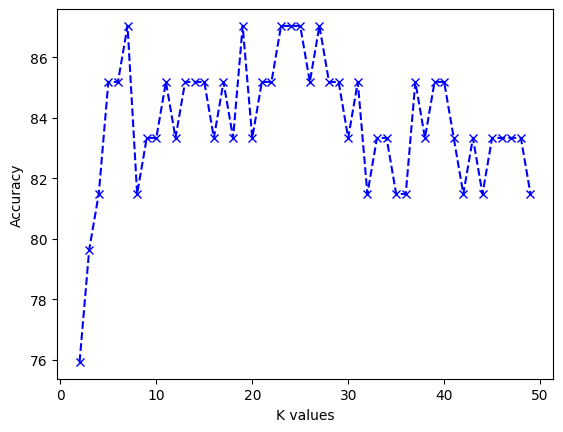

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 

accuracy_vals = []  # Creating an empty list to store accuracy values for different K values

#Iterating over K: This allows the evaluation of different K values to observe how the accuracy of the predictions changes. 
for i in range(2, 50):
    knn = KNeighborsClassifier(n_neighbors=i)  # Creating a KNeighborsClassifier with current K value
    knn.fit(X_train, y_train)  # Fitting the model to the training data
    y_pred = knn.predict(X_test)  # Predicting the labels for the test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculating the accuracy score
    accuracy_vals.append(accuracy * 100)  # Adding the accuracy score to the list

# Plotting the K values on the x-axis and accuracy scores on the y-axis
plt.plot(range(2, 50), accuracy_vals, color='blue', marker='x', linestyle='dashed')
plt.xlabel('K values')  # Setting the label for the x-axis
plt.ylabel('Accuracy')  # Setting the label for the y-axis
plt.show()  # Displaying the plot


The x-axis represents the K values, which indicate the number of nearest neighbors considered in the K-Nearest Neighbors algorithm.
The y-axis represents the accuracy values, which indicate the performance of the model in terms of accuracy.
The plot shows a line with markers (x symbols) connecting the K values on the x-axis to the corresponding accuracy values on the y-axis.
By observing the graph, we can analyze how the accuracy of the model changes with different K values.
we can identify trends, patterns, or optimal K values by examining the shape, trend, or peaks in the graph.


why chi-squared :
Computational Efficiency: The computational cost of KNN increases with larger K values since more neighbors need to be considered. Choosing an excessively large K may result in a significant increase in computational time and memory requirements. It's essential to consider the computational resources available and strike a balance between accuracy and computational efficiency.

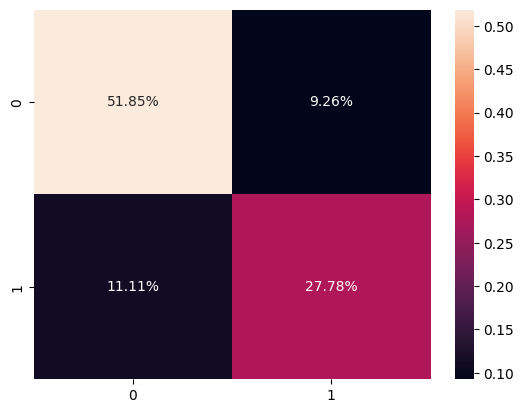

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.75      0.71      0.73        21

    accuracy                           0.80        54
   macro avg       0.79      0.78      0.78        54
weighted avg       0.79      0.80      0.80        54

Accuracy: 0.7962962962962963


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%')
plt.show()

report = classification_report(y_test, y_pred)
accuracy = (cf_matrix[0, 0] + cf_matrix[1, 1]) / np.sum(cf_matrix)
print(report)
print("Accuracy:", accuracy)


In [ ]:
#This code trains a Random Forest Classifier with varying numbers of decision trees (or estimators) and evaluates the accuracy of the classifier for each value of the number of estimators.
numbers=[50,100,150,200,250,300,350,400,450,500,550,600]
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

pl1 = []

for num in numbers:
    clf = RandomForestClassifier(n_estimators=num)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = (cf_matrix[0,0]+cf_matrix[1,1]) / np.sum(cf_matrix)
    print(f"Accuracy for n_estimators = {num}: {accuracy}")
    print(f"Score for n_estimators = {num}: {clf.score(X_test, y_test)}")
    print(f"Number of estimators: {num}")
    pl1.append(accuracy)


Accuracy for n_estimators = 50: 0.8148148148148148
Score for n_estimators = 50: 0.8148148148148148
Number of estimators: 50
Accuracy for n_estimators = 100: 0.8333333333333334
Score for n_estimators = 100: 0.8333333333333334
Number of estimators: 100
Accuracy for n_estimators = 150: 0.7962962962962963
Score for n_estimators = 150: 0.7962962962962963
Number of estimators: 150
Accuracy for n_estimators = 200: 0.8333333333333334
Score for n_estimators = 200: 0.8333333333333334
Number of estimators: 200
Accuracy for n_estimators = 250: 0.8333333333333334
Score for n_estimators = 250: 0.8333333333333334
Number of estimators: 250
Accuracy for n_estimators = 300: 0.8518518518518519
Score for n_estimators = 300: 0.8518518518518519
Number of estimators: 300
Accuracy for n_estimators = 350: 0.8518518518518519
Score for n_estimators = 350: 0.8518518518518519
Number of estimators: 350
Accuracy for n_estimators = 400: 0.8518518518518519
Score for n_estimators = 400: 0.8518518518518519
Number of est

 this code helps determine the optimal number of estimators to use for the random forest classifier by evaluating the accuracy of the classifier for different values of the number of estimators.

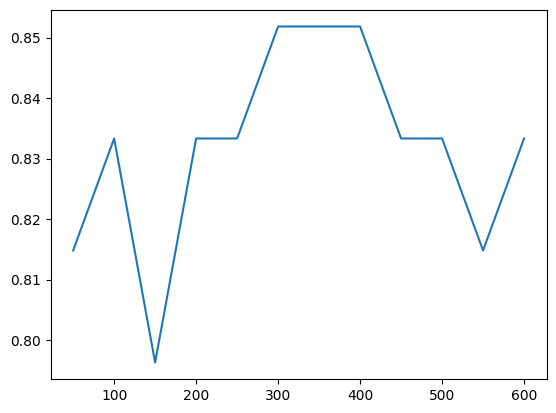

In [ ]:
plt.plot(numbers,pl1)

The resulting plot provides insights into how the accuracy of the Random Forest Classifier varies with different numbers of estimators. It helps in identifying the number of estimators that provides the highest accuracy or understanding the general trend of accuracy as the number of estimators changes.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

pl1 = []

for num in range(1, 30):
    clf = RandomForestClassifier(n_estimators=num)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = (cf_matrix[0,0]+cf_matrix[1,1]) / np.sum(cf_matrix)
    print(f"Accuracy for n_estimators = {num}: {accuracy}")
    pl1.append(accuracy)


Accuracy for n_estimators = 1: 0.6111111111111112
Accuracy for n_estimators = 2: 0.7592592592592593
Accuracy for n_estimators = 3: 0.7222222222222222
Accuracy for n_estimators = 4: 0.7592592592592593
Accuracy for n_estimators = 5: 0.7962962962962963
Accuracy for n_estimators = 6: 0.7592592592592593
Accuracy for n_estimators = 7: 0.7037037037037037
Accuracy for n_estimators = 8: 0.7962962962962963
Accuracy for n_estimators = 9: 0.8333333333333334
Accuracy for n_estimators = 10: 0.7222222222222222
Accuracy for n_estimators = 11: 0.7962962962962963
Accuracy for n_estimators = 12: 0.8148148148148148
Accuracy for n_estimators = 13: 0.7592592592592593
Accuracy for n_estimators = 14: 0.7777777777777778
Accuracy for n_estimators = 15: 0.8148148148148148
Accuracy for n_estimators = 16: 0.7407407407407407
Accuracy for n_estimators = 17: 0.7777777777777778
Accuracy for n_estimators = 18: 0.8333333333333334
Accuracy for n_estimators = 19: 0.8148148148148148
Accuracy for n_estimators = 20: 0.833333

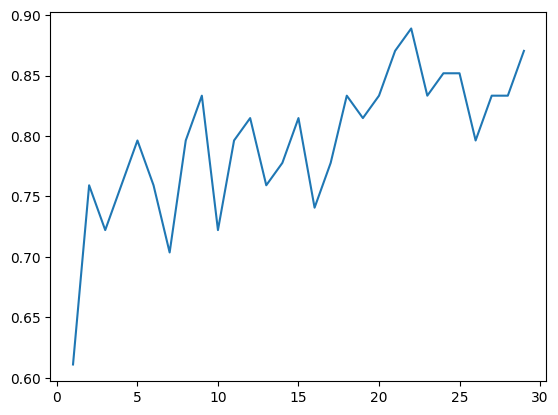

In [ ]:
plt.plot(range(1,30),pl1)

(20.0, 30.0)

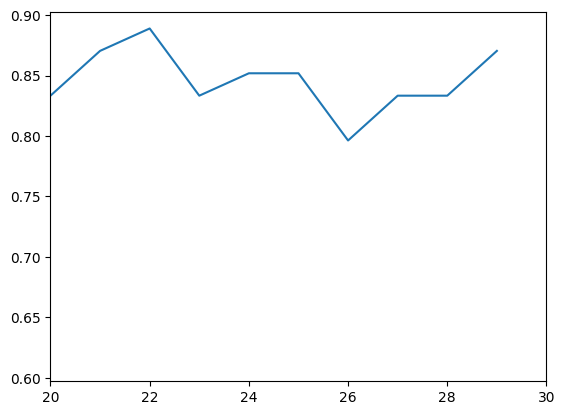

In [ ]:
plt.plot(range(1,30),pl1)
plt.xlim(20,30)

In [ ]:
clf = RandomForestClassifier(n_estimators=21)

while True:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    
    if accuracy > 0.93:
        break


In [ ]:
clf.score(X_test,y_test)

0.9444444444444444

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.95      0.90      0.93        21

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54

0.9444444444444444


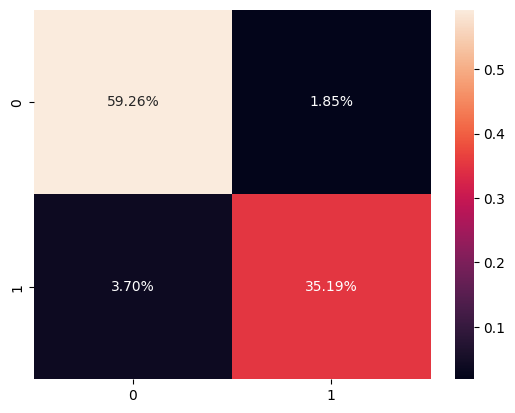

In [ ]:
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
report = classification_report (y_test, y_pred)
print(report)
print((cf_matrix[0,0]+cf_matrix[1,1])/(cf_matrix[0,0]+cf_matrix[1,1]+cf_matrix[0,1]+cf_matrix[1,0]))

In [ ]:
cf_matrix

array([[32,  1],
       [ 2, 19]])